In [27]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer

In [28]:
def readFile():
    #Массив массивов типа: [[x1, y1],..., [x10, y10]]
    coords = []
    path = "data.csv"
    file = pd.read_csv(path, delimiter = ",")
    for counter in range(0, 371):
        #Проверка на пустую ячейку
        if math.isnan(file["x10"][counter]):
            break
        coords.append([file["x10"][counter].astype(int), file["y10"][counter].astype(int)])
    return coords

In [29]:
def kmeans(save, clusters):
    #Размер 16:9
    plt.rcParams['figure.figsize'] = (16, 9)

    coords = np.asarray(readFile())
    plt.scatter(coords[:, 0], coords[:, 1], cmap = 'viridis')
    plt.show()

    #Инициализация KMeans
    kmeans = KMeans(n_clusters = clusters)
    #Передаем входные данные
    kmeans = kmeans.fit(coords)
    #Разбиение на кластеры
    labels = kmeans.predict(coords)
    #Забираем координаты центров кластеров
    centers = kmeans.cluster_centers_
    
    plt.scatter(coords[:, 0], coords[:, 1], c = labels, s = 50, cmap = 'viridis')
    #Рисует звездочки в центрах кластеров
    plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = "*", s = 1000, alpha=0.5);
    #Сохранение результатов кластеризации для дальнейшего анализа
    if save:    
        plt.savefig(f"k-means/{clusters}_clusters.png", dpi = 80)
        plt.show()

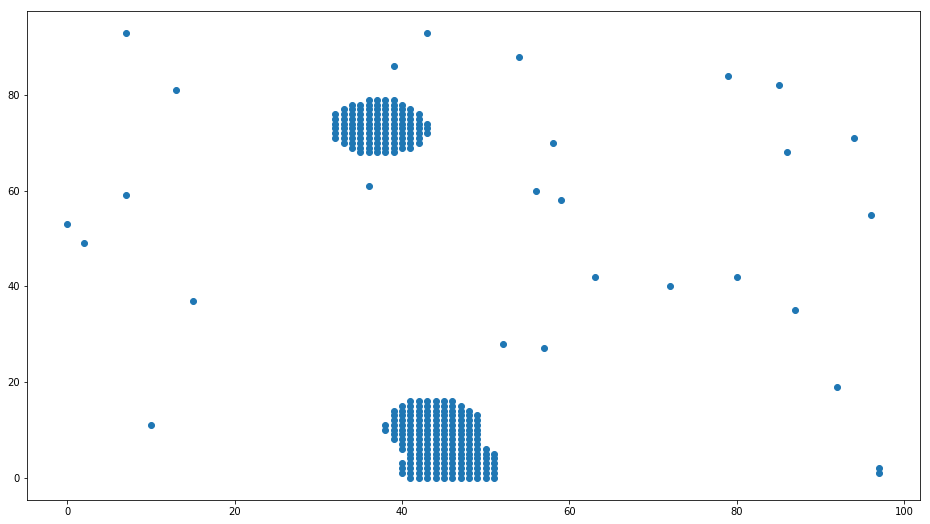

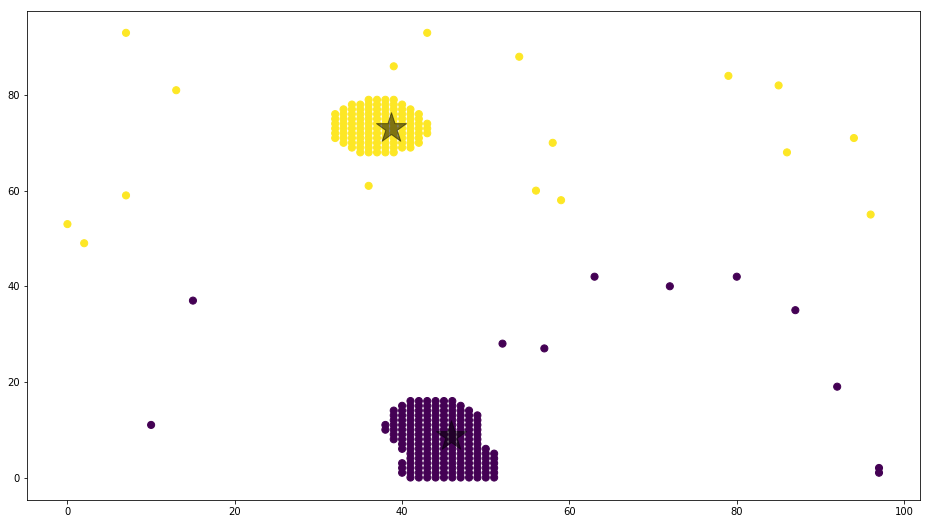

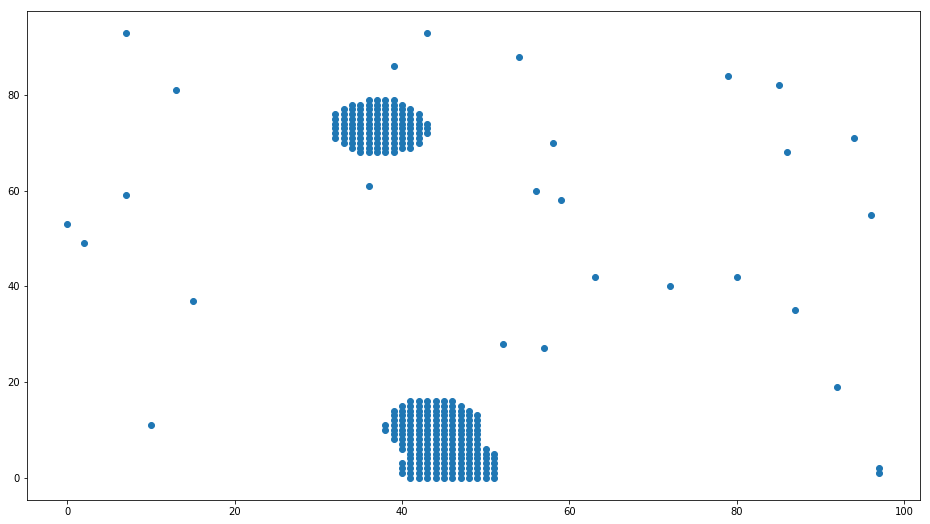

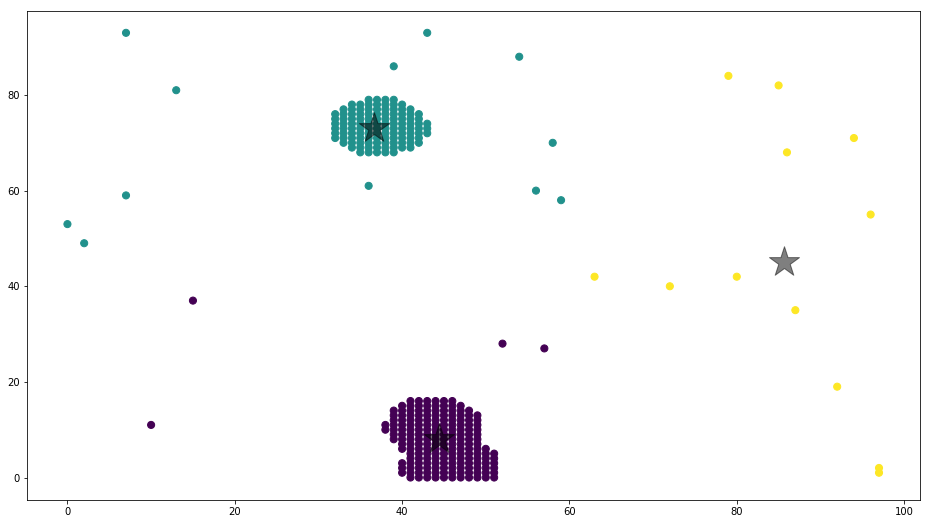

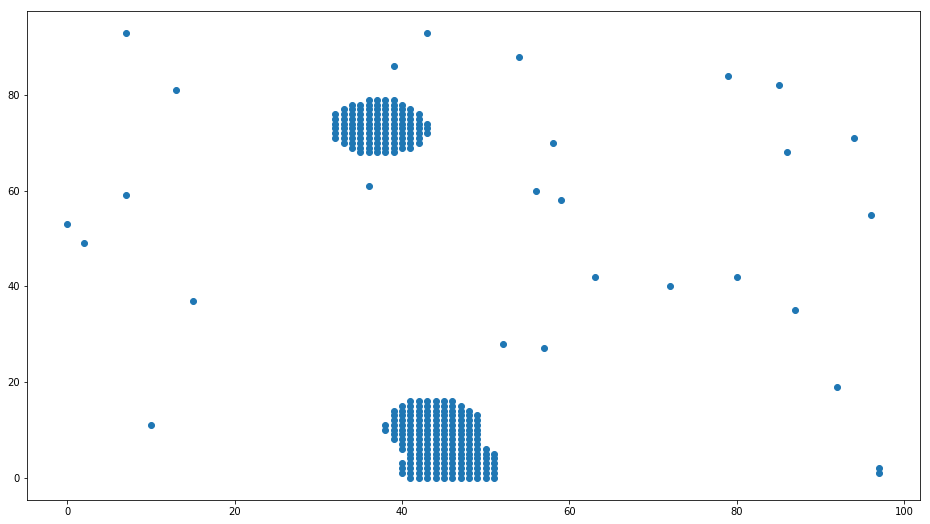

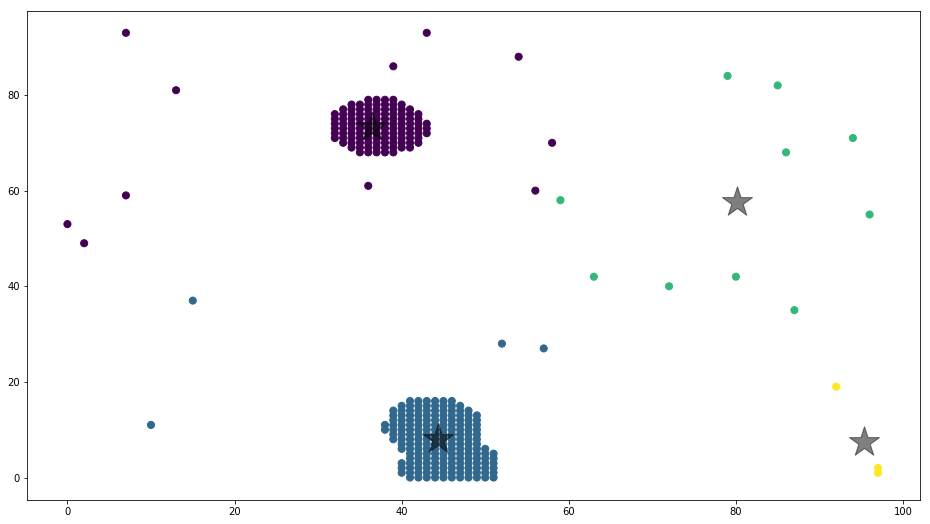

In [30]:
#Сохранение результатов работы
save = True
#Запуск алгоритма k-means
for i in range(2, 5):
    kmeans(save, i)

In [35]:
def kmed(save, initial_medians):
    plt.rcParams['figure.figsize'] = (16, 9)
    coords = np.asarray(readFile())
    kmedians_instance = kmedians(coords, initial_medians)
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()
    colors = ['y','m','g','b']
    nColor = 0
    for i in clusters:
        for j in i:
            c = coords[j]
            plt.scatter(c[0], c[1], c = colors[nColor], s = 50, cmap = 'viridis')
        nColor= nColor+1
    for i in medians:
        plt.scatter(i[0], i[1], c = 'black', marker = "*", s = 1000, alpha=0.5)    
    if save:
        plt.savefig(f"k-medians/{len(clusters)}_clusters.png", dpi = 80)
        plt.show()

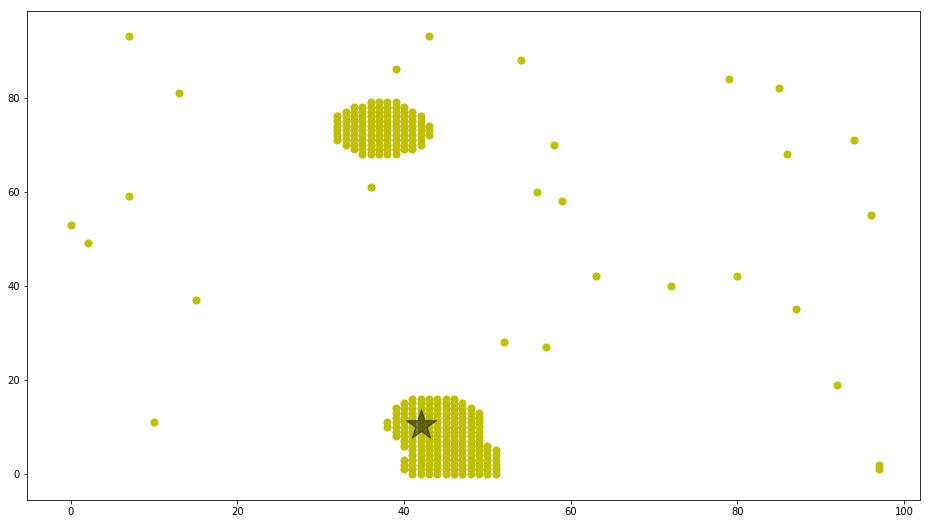

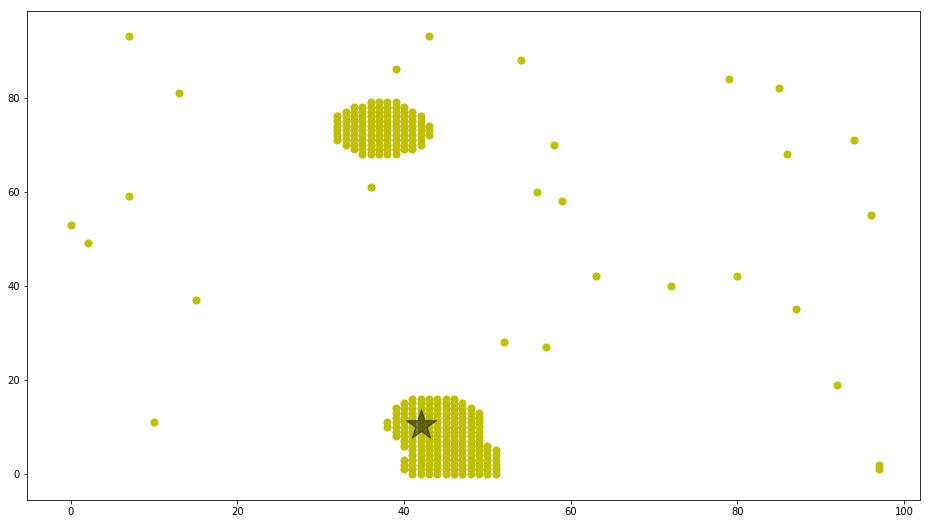

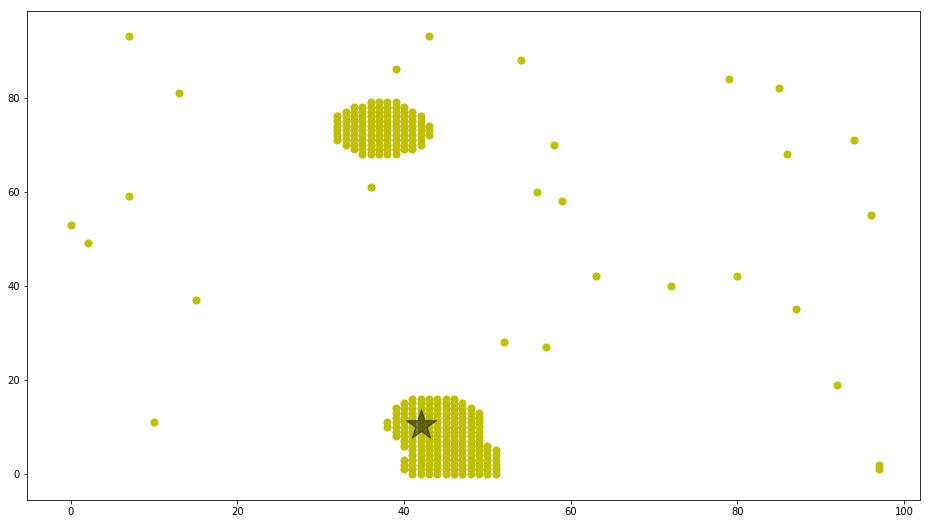

In [36]:
#Запуск алгоритма k-medians
initial_medians = [[[0.0, 0.1], [2.5, 0.7]],[[0.0, 0.1], [2.5, 0.7],[5.0,1.9]],[[0.0, 0.1], [2.5, 0.7],[5.0,1.9],[7.5, 3.5]]]
for med in initial_medians:
    kmed(save, med)